In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data = pd.read_csv('Advertising_raw.csv', index_col=0)
data.sample(5)

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
67,31.5,24.6,2.2,9.5
195,149.7,35.6,6.0,17.3
154,171.3,39.7,37.7,19.0
57,7.3,28.1,41.4,5.5


In [3]:
data.shape

(200, 4)

### Simple Linear Regression

Only using 1 feature i.e: Money spent on TV Ads.

Text(0, 0.5, 'Sales')

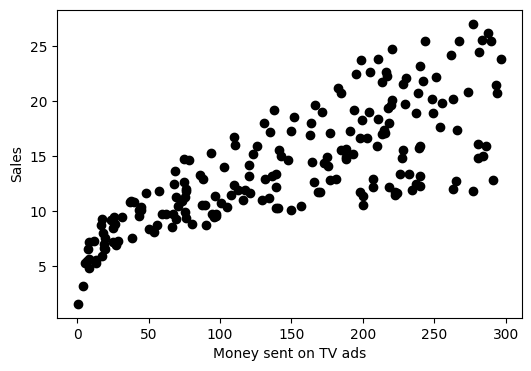

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(data.TV, data.sales, c='k')
plt.xlabel("Money sent on TV ads")
plt.ylabel('Sales')

In [8]:
x = data.TV.values.reshape(-1,1)
y = data.sales.values.reshape(-1,1)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
model.fit(x, y)
print(f"Lienar Model is : Y = {model.coef_[0][0]}*TV + {model.intercept_[0]}")

Lienar Model is : Y = 0.04753664043301975*TV + 7.032593549127695


Text(0, 0.5, 'Sales')

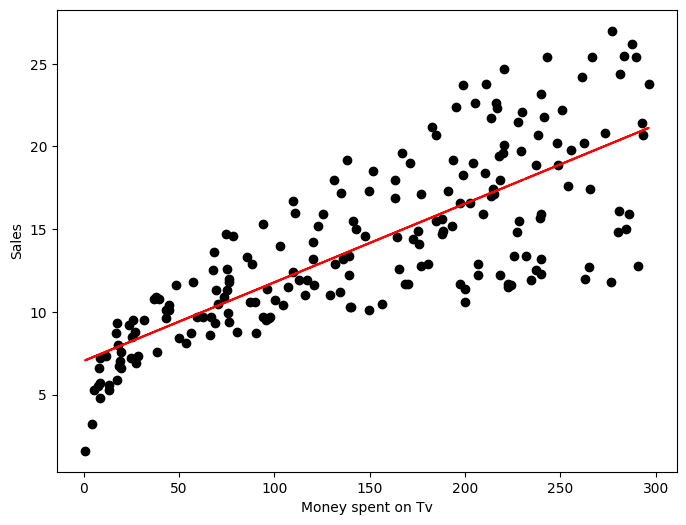

In [18]:
pred = model.predict(x)

plt.figure(figsize=(8,6))
plt.scatter(x, y, c='k')
plt.plot(x, pred, c='r')
plt.xlabel("Money spent on Tv")
plt.ylabel("Sales")

Fitting another model using the stats Library

In [19]:
x = data.TV
y = data.sales

exog = sm.add_constant(x)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 31 May 2024   Prob (F-statistic):           1.47e-42
Time:                        15:18:27   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

### Multiple Linear Regression
Here we are using all the feature to predict the sales

In [27]:
x = data.drop(['sales'], axis= 1)
y = data.sales

model = LinearRegression()
model.fit(x, y)
print(f"The Model is : Y = {model.intercept_} + {model.coef_[0]}*TV + {model.coef_[1]}*Radio + {model.coef_[2]}*NewsPaper")

The Model is : Y = 2.9388893694594085 + 0.0457646454553976*TV + 0.18853001691820453*Radio + -0.0010374930424762834*NewsPaper


In [30]:
pred = model.predict(x)

In [33]:
x = np.column_stack((data.TV, data.radio, data.newspaper))
y = data.sales.values.reshape(-1, 1)

exog = sm.add_constant(x)
est = sm.OLS (y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 31 May 2024   Prob (F-statistic):           1.58e-96
Time:                        15:29:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Since here the $P$ value for _x3_ i.e our Newspaper > 0.05 that means that is not that relavent in our data set.